In [1]:
# importing necessary libraries
import pandas as pd
import warnings 
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
from sklearn.feature_extraction.text import TfidfVectorizer 
from sklearn.model_selection import train_test_split 
from sklearn.naive_bayes import MultinomialNB, BernoulliNB 
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report
import nltk
import string


In [2]:
#read the dataset
df = pd.read_csv('ecommerceDataset.csv')

In [3]:
# naming the column because there is no name of columns mentioned in dataset 
df.columns = ['Class', 'Description']
df.head()

,Class,Description
0,Household,"SAF 'Floral' Framed Painting (Wood, 30 inch x ..."
1,Household,SAF 'UV Textured Modern Art Print Framed' Pain...
2,Household,"SAF Flower Print Framed Painting (Synthetic, 1..."
3,Household,Incredible Gifts India Wooden Happy Birthday U...
4,Household,Pitaara Box Romantic Venice Canvas Painting 6m...


In [4]:
df.columns

Index(['Class', 'Description'], dtype='object')

In [5]:
df.info() #dataset info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50424 entries, 0 to 50423
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Class        50424 non-null  object
 1   Description  50423 non-null  object
dtypes: object(2)
memory usage: 788.0+ KB


In [6]:
# finding the null values 
df.isnull().sum()

Class          0
Description    1
dtype: int64

In [7]:
# fill the null value with empty string
df['Description'] = df['Description'].fillna('')

In [8]:
class_counts = df['Class'].value_counts()
print(class_counts)


Class
Household                 19312
Books                     11820
Electronics               10621
Clothing & Accessories     8671
Name: count, dtype: int64


In [9]:
19312+11820+10621+8671

50424

# Remove Punctuations and Stopwords

In [10]:
# storeing stopwords in stopword to romove them from Description
stopword = set(stopwords.words('english'))
stopword

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [11]:
def preprocess_text(text):
    if isinstance(text,str):
        # Tokenize the text into word
        words = nltk.word_tokenize(text.lower()) #make all the text into lower case

        # Remove punctuations
        words = [word for word in words if word not in string.punctuation]

        # Remove stopword 
        filtered_words = [word for word in words if word not in stopword]

        # Join the words into a text
        sentence = ' '.join(filtered_words)

        return sentence
    else:
        return ''


In [12]:
df['Description'] = df['Description'].apply(preprocess_text)

In [13]:
df.Description


0        saf 'floral framed painting wood 30 inch x 10 ...
1        saf 'uv textured modern art print framed paint...
2        saf flower print framed painting synthetic 13....
3        incredible gifts india wooden happy birthday u...
4        pitaara box romantic venice canvas painting 6m...
                               ...                        
50419    strontium microsd class 10 8gb memory card bla...
50420    crossbeats wave waterproof bluetooth wireless ...
50421    karbonn titanium wind w4 white karbonn titaniu...
50422    samsung guru fm plus sm-b110e/d black colour b...
50423                       micromax canvas win w121 white
Name: Description, Length: 50424, dtype: object

# Lemmatization

In [14]:
lemmatizer = WordNetLemmatizer()

def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN  # Default to NOUN if the POS tag is not recognized

def lemmatize_text(text):
    words = nltk.word_tokenize(text)
    pos_tags = nltk.pos_tag(words)
    lemmatized_words = [lemmatizer.lemmatize(word, get_wordnet_pos(pos_tag)) for word, pos_tag in pos_tags]
    lemmatized_text = ' '.join(lemmatized_words)
    return lemmatized_text



In [15]:
df['Description'] = df['Description'].apply(lemmatize_text)

In [16]:
df.Description

0        saf 'floral frame paint wood 30 inch x 10 inch...
1        saf 'uv textured modern art print frame paint ...
2        saf flower print frame paint synthetic 13.5 in...
3        incredible gift india wooden happy birthday un...
4        pitaara box romantic venice canvas paint 6mm t...
                               ...                        
50419    strontium microsd class 10 8gb memory card bla...
50420    crossbeats wave waterproof bluetooth wireless ...
50421    karbonn titanium wind w4 white karbonn titaniu...
50422    samsung guru fm plus sm-b110e/d black colour b...
50423                       micromax canvas win w121 white
Name: Description, Length: 50424, dtype: object

# TF-IDF vectorizer

In [17]:
vector = TfidfVectorizer()
x = vector.fit_transform(df['Description'])
y = df['Class']

# Split the Dataset into train test

In [18]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size = .2, random_state = 42)

# Fit models and Performance Evaluation

**Fit the dataset with multinomialNB and BernoulliNB**

In [19]:
multinomial = MultinomialNB()
multinomial.fit(xtrain,ytrain)

MultinomialNB()

In [25]:
y_predMNB = multinomial.predict(xtest)
resultMNB = classification_report(ytest,y_predMNB,output_dict=True)
accMNB = resultMNB['accuracy']
print('Classification Report: on test case \n\n',classification_report(ytest,y_predMNB))

Classification Report: on test case 

                         precision    recall  f1-score   support

                 Books       0.97      0.92      0.95      2379
Clothing & Accessories       0.98      0.94      0.96      1750
           Electronics       0.96      0.90      0.93      2082
             Household       0.90      0.98      0.94      3874

              accuracy                           0.94     10085
             macro avg       0.96      0.94      0.94     10085
          weighted avg       0.95      0.94      0.94     10085



In [26]:
y_predMNB = multinomial.predict(xtrain)

print('Classification Report: on train case \n\n',classification_report(ytrain,y_predMNB))

Classification Report: on train case 

                         precision    recall  f1-score   support

                 Books       0.98      0.92      0.95      9441
Clothing & Accessories       0.98      0.95      0.97      6921
           Electronics       0.96      0.92      0.94      8539
             Household       0.91      0.98      0.95     15438

              accuracy                           0.95     40339
             macro avg       0.96      0.94      0.95     40339
          weighted avg       0.95      0.95      0.95     40339



In [22]:
Bernoulli = BernoulliNB() 
Bernoulli.fit(xtrain,ytrain)

BernoulliNB()

In [27]:
y_predBNB = Bernoulli.predict(xtest)
resultBNB= classification_report(ytest,y_predBNB,output_dict=True)
accBNB = resultBNB['accuracy'] 
print('Classification Report: test case\n\n',classification_report(ytest,y_predBNB))

Classification Report: test case

                         precision    recall  f1-score   support

                 Books       0.97      0.73      0.83      2379
Clothing & Accessories       0.70      0.98      0.82      1750
           Electronics       0.95      0.84      0.90      2082
             Household       0.92      0.95      0.94      3874

              accuracy                           0.88     10085
             macro avg       0.89      0.88      0.87     10085
          weighted avg       0.90      0.88      0.88     10085



In [24]:
y_predBNB = Bernoulli.predict(xtrain)
print('Classification Report: train case\n\n',classification_report(ytrain,y_predBNB))

Classification Report: train case

                         precision    recall  f1-score   support

                 Books       0.97      0.72      0.83      9441
Clothing & Accessories       0.69      0.98      0.81      6921
           Electronics       0.96      0.85      0.90      8539
             Household       0.93      0.95      0.94     15438

              accuracy                           0.88     40339
             macro avg       0.89      0.88      0.87     40339
          weighted avg       0.90      0.88      0.88     40339



# Fit the data using Ensamble model BalanceRandomForest classifier

In [29]:
from imblearn.ensemble import BalancedRandomForestClassifier

In [30]:
BRF = BalancedRandomForestClassifier(random_state=42)
BRF.fit(xtrain,ytrain) 

C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\imblearn\ensemble\_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\imblearn\ensemble\_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


BalancedRandomForestClassifier(random_state=42)

In [31]:
y_predBRF = BRF.predict(xtest)
resultBRF= classification_report(ytest,y_predBRF,output_dict=True)
accBRF = resultBRF['accuracy'] 

In [32]:
print('Classification Report:\n\n', classification_report(ytest,y_predBRF))

Classification Report:

                         precision    recall  f1-score   support

                 Books       0.98      0.97      0.97      2379
Clothing & Accessories       0.96      0.99      0.97      1750
           Electronics       0.97      0.97      0.97      2082
             Household       0.98      0.97      0.97      3874

              accuracy                           0.97     10085
             macro avg       0.97      0.97      0.97     10085
          weighted avg       0.97      0.97      0.97     10085



# Modify the dataset with SMOTE for better accuracy in Bernoulli and Multinomial

In [33]:
from imblearn.over_sampling import SMOTE

In [34]:
smote = SMOTE(random_state=42)
x_smote,y_smote = smote.fit_resample(x,y)

In [35]:
class_counts_after = pd.Series(y_smote).value_counts()
class_counts_after

Class
Household                 19312
Books                     19312
Clothing & Accessories    19312
Electronics               19312
Name: count, dtype: int64

**SPLIT the dataset**

In [36]:
xtrainSmote,xtestSmote,ytrainSmote,ytestSmote = train_test_split(x_smote,y_smote,test_size = 0.2, random_state = 42)

**MultinomialNB**

In [37]:
multinomial = MultinomialNB() 
multinomial.fit(xtrainSmote,ytrainSmote)

MultinomialNB()

In [47]:
y_predMNBsmote = multinomial.predict(xtestSmote)
resultMNBsmote= classification_report(ytestSmote,y_predMNBsmote,output_dict=True)
accMNBsmote = resultMNBsmote['accuracy'] 
print('Classification Report: on test case \n\n',classification_report(ytestSmote,y_predMNBsmote))

Classification Report: on test case 

                         precision    recall  f1-score   support

                 Books       0.98      0.94      0.96      3976
Clothing & Accessories       0.97      0.99      0.98      3874
           Electronics       0.96      0.95      0.96      3786
             Household       0.93      0.96      0.94      3814

              accuracy                           0.96     15450
             macro avg       0.96      0.96      0.96     15450
          weighted avg       0.96      0.96      0.96     15450



**Bernoulli**

In [49]:
Bernoulli = BernoulliNB()
Bernoulli.fit(xtrainSmote,ytrainSmote)

BernoulliNB()

In [50]:
y_predBNBsmote = Bernoulli.predict(xtestSmote)
resultBNBsmote= classification_report(ytestSmote,y_predBNBsmote,output_dict=True)
accBNBsmote = resultBNBsmote['accuracy'] 
print('Classification Report: on test case \n\n',classification_report(ytestSmote,y_predBNBsmote))

Classification Report: on test case 

                         precision    recall  f1-score   support

                 Books       0.97      0.71      0.82      3976
Clothing & Accessories       0.77      0.99      0.87      3874
           Electronics       0.96      0.83      0.89      3786
             Household       0.84      0.95      0.89      3814

              accuracy                           0.87     15450
             macro avg       0.89      0.87      0.87     15450
          weighted avg       0.89      0.87      0.87     15450



# XGboost Classifier

In [51]:
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder

In [52]:
LE = LabelEncoder()
y_encoded = LE.fit_transform(y_smote)

In [53]:
xtrainXG,xtestXG,ytrainXG,ytestXG = train_test_split(x_smote,y_encoded,test_size = 0.2, random_state = 42)

In [54]:
xgBoost = XGBClassifier(subsample = 0.8, reg_alpha = 0.1, n_estimators = 300, min_child_weight = 1, learning_rate = 0.1, colsample_bytree = 0.7, random_state = 42)

xgBoost.fit(xtrainXG, ytrainXG)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.7, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=300, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [55]:
y_predXG = xgBoost.predict(xtestXG)
resultXG= classification_report(ytestXG,y_predXG,output_dict=True)
accXG = resultXG['accuracy'] 
print('Classification report:\n\n', classification_report(ytestXG,y_predXG))

Classification report:

               precision    recall  f1-score   support

           0       0.97      0.97      0.97      3976
           1       0.99      0.99      0.99      3874
           2       0.98      0.97      0.97      3786
           3       0.96      0.96      0.96      3814

    accuracy                           0.97     15450
   macro avg       0.97      0.97      0.97     15450
weighted avg       0.97      0.97      0.97     15450



# Visualze Accuracy of all the MODEL 

In [68]:
model_names = ['Multinomial', 'Bernoulli', 'Balanced Random Forest', 'Multinomial Smote', 'Bernoulli Smote', 'XGBoost']
accuracy_scores = [accMNB, accBNB, accBRF, accMNBsmote, accBNBsmote, accXG]

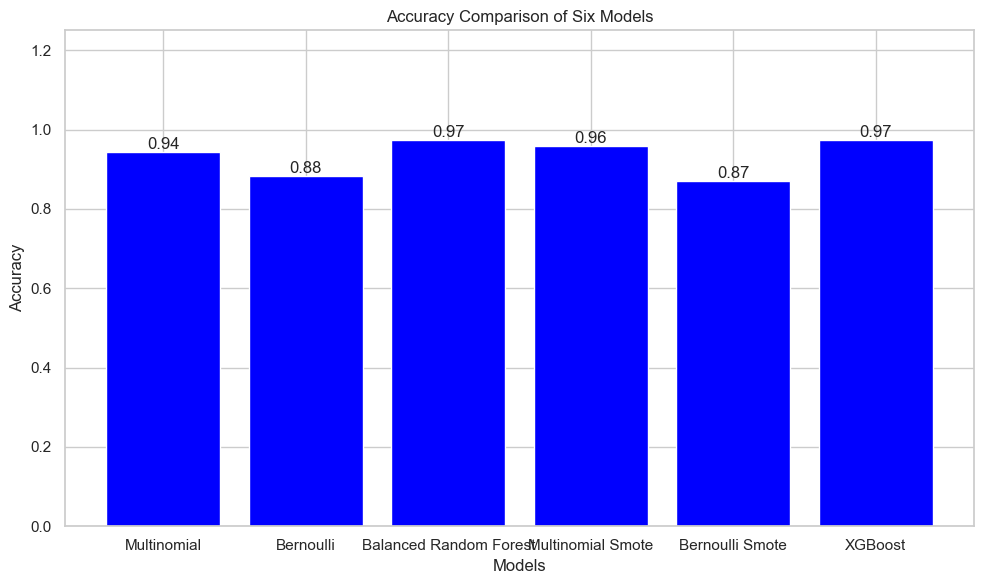

In [69]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style of the plot using Seaborn
sns.set(style="whitegrid")

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(model_names, accuracy_scores, color='blue')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison of Six Models')
plt.ylim(0, 1.25)  # Set the y-axis limit to 0-1.25 (assuming accuracy scores are in the range [0, 1])

# Add labels to the bars
for i, score in enumerate(accuracy_scores):
    plt.text(i, score, f'{score:.2f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()